<a href="https://colab.research.google.com/github/elinteerie/Models/blob/main/Medical_Cost_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import keras
from tensorflow.keras import layers, Sequential

In [13]:
insurance = pd.read_csv('/content/drive/MyDrive/datafiles/insurance.csv')

In [14]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [16]:
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
len(data)

1338

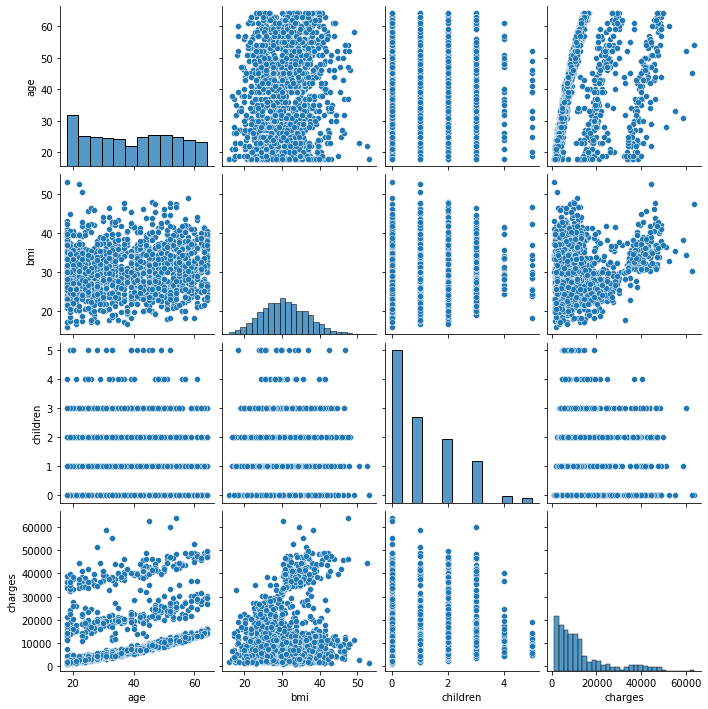

In [17]:
sns.pairplot(insurance)

In [18]:
insurance.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [20]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [22]:
#onehot encode
insurance_one = pd.get_dummies(insurance)

In [30]:
X = insurance_one.drop('charges', axis =1)
y= insurance_one['charges']

In [26]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [29]:
insurance_one.corr()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,0.020856,-0.020856,0.025019,-0.025019,0.002475,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,-0.046371,0.046371,-0.003750,0.003750,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,-0.017163,0.017163,-0.007673,0.007673,-0.022808,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,-0.057292,0.057292,-0.787251,0.787251,0.006349,-0.039905,0.073982,-0.043210
sex_female,0.020856,-0.046371,-0.017163,-0.057292,1.000000,-1.000000,0.076185,-0.076185,0.002425,0.011156,-0.017117,0.004184
sex_male,-0.020856,0.046371,0.017163,0.057292,-1.000000,1.000000,-0.076185,0.076185,-0.002425,-0.011156,0.017117,-0.004184
smoker_no,0.025019,-0.003750,-0.007673,-0.787251,0.076185,-0.076185,1.000000,-1.000000,-0.002811,0.036945,-0.068498,0.036945
smoker_yes,-0.025019,0.003750,0.007673,0.787251,-0.076185,0.076185,-1.000000,1.000000,0.002811,-0.036945,0.068498,-0.036945
region_northeast,0.002475,-0.138156,-0.022808,0.006349,0.002425,-0.002425,-0.002811,0.002811,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,0.011156,-0.011156,0.036945,-0.036945,-0.320177,1.000000,-0.346265,-0.320829


In [31]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

In [36]:
len(X_train), len(y_train), len(X_test), len(y_test)

(1070, 1070, 268, 268)

In [42]:
X_train.shape

(1070, 11)

In [67]:
#Build a Neural Network
tf.random.set_seed(42)
insurance_model = tf.keras.Sequential([
   tf.keras.layers.Dense(10, input_shape =[11]),
   tf.keras.layers.Dense(1)
])

insurance_model.compile(loss = tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.SGD(lr =0.001),
              metrics = ['mae'] )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [68]:
insurance_model.fit(X_train, y_train, epochs =100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13144.9453 - mae: 13144.9453
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 9795.1201 - mae: 9795.1201
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7296.2007 - mae: 7296.2007
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7232.9653 - mae: 7232.9653
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7167.8291 - mae: 7167.8291
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7108.8794 - mae: 7108.8794
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7044.5029 - mae: 7044.5029
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 6985.0747 - mae: 6985.0747
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 6936.8198 - mae: 6936.8198
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 6887.4077 - mae: 6887.40

In [63]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [64]:
#Model not performing too well

In [78]:
#Build a Neural Network
tf.random.set_seed(42)
insurance_model2 = tf.keras.Sequential([
   tf.keras.layers.Dense(100, input_shape =[11]),
   tf.keras.layers.Dense(10),
   tf.keras.layers.Dense(1)
])

insurance_model2.compile(loss = tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.Adam(),
              metrics = ['mae'] )

insurance_model2.fit(X_train, y_train, epochs = 150)


Epoch 1/150
34/34 [==============================] - 1s 4ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/150
34/34 [==============================] - 0s 4ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/150
34/34 [==============================] - 0s 5ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/150
34/34 [==============================] - 0s 4ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/150
34/34 [==============================] - 0s 5ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/150
34/34 [==============================] - 0s 5ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/150
34/34 [==============================] - 0s 3ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/150
34/34 [==============================] - 0s 3ms/step - loss: 7528.8413 - mae: 7528.8413
Epoch 9/150
34/34 [==============================] - 0s 5ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/150
34/34 [==============================] - 0s 5ms/step - loss: 7409.0811 - mae:

In [80]:
insurance_model2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3613.4690 - mae: 3613.4690


[3613.468994140625, 3613.468994140625]

In [98]:
callss = tf.keras.callbacks.EarlyStopping(
    monitor="mae",
    min_delta=6,
    patience=12,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

In [108]:
#Build a Neural Network
tf.random.set_seed(42)
insurance_model3 = tf.keras.Sequential([
   tf.keras.layers.BatchNormalization(),                                     
   tf.keras.layers.Dense(100, input_shape =[11],activation="relu"),
   tf.keras.layers.BatchNormalization(),
   tf.keras.layers.Dense(10,activation="relu"),
   tf.keras.layers.Dense(1)
])

insurance_model3.compile(loss = tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.Adam(),
              metrics = ['mae'] )

history = insurance_model3.fit(X_train, 
                               y_train, 
                               epochs= 500)


Epoch 1/500
34/34 [==============================] - 2s 4ms/step - loss: 13346.2285 - mae: 13346.2285
Epoch 2/500
34/34 [==============================] - 0s 6ms/step - loss: 13344.9023 - mae: 13344.9023
Epoch 3/500
34/34 [==============================] - 0s 4ms/step - loss: 13343.3936 - mae: 13343.3936
Epoch 4/500
34/34 [==============================] - 0s 5ms/step - loss: 13340.9404 - mae: 13340.9404
Epoch 5/500
34/34 [==============================] - 0s 6ms/step - loss: 13336.8545 - mae: 13336.8545
Epoch 6/500
34/34 [==============================] - 0s 5ms/step - loss: 13330.1025 - mae: 13330.1025
Epoch 7/500
34/34 [==============================] - 0s 4ms/step - loss: 13319.1582 - mae: 13319.1582
Epoch 8/500
34/34 [==============================] - 0s 7ms/step - loss: 13302.7178 - mae: 13302.7178
Epoch 9/500
34/34 [==============================] - 0s 6ms/step - loss: 13278.1738 - mae: 13278.1738
Epoch 10/500
34/34 [==============================] - 0s 4ms/step - loss: 13243.06

In [109]:
insurance_model3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1784.0602 - mae: 1784.0602


[1784.0601806640625, 1784.0601806640625]

Text(0.5, 0, 'epochs')

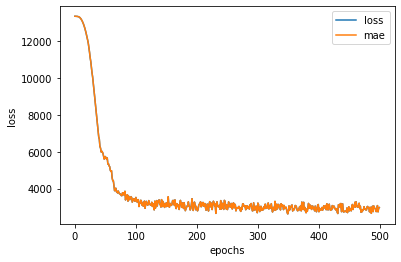

In [110]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')